In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.datasets import make_regression, make_swiss_roll
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
hoops_df = pd.read_csv('../Resources/cbb.csv')
hoops_df

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,...,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
0,North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,...,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1.0,2016
1,Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,...,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1.0,2015
2,Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,...,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3.0,2018
3,Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,...,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND,3.0,2019
4,Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,...,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND,1.0,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,Michigan St.,B10,35,26,111.4,87.8,0.9392,50.6,44.5,20.8,...,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16,3.0,2013
2451,Arizona,P12,35,27,114.4,92.2,0.9229,52.5,46.6,19.5,...,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16,6.0,2013
2452,Oregon,P12,37,28,104.8,88.6,0.8728,49.3,46.4,21.4,...,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16,12.0,2013
2453,La Salle,A10,34,24,112.0,96.2,0.8516,51.9,49.3,17.1,...,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16,13.0,2013


In [3]:
hoops_df = hoops_df.drop(["G","TEAM","SEED","CONF","YEAR"], axis=1)
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2ND
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2ND
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,S16
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,S16
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,S16
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,S16


In [4]:
hoops_df = hoops_df.dropna(subset=['POSTSEASON'])

In [5]:
class_count = hoops_df['POSTSEASON'].value_counts()
class_count

R64          224
R32          112
S16           56
E8            28
R68           28
F4            14
2ND            7
Champions      7
Name: POSTSEASON, dtype: int64

In [6]:
classifications_to_replace = list(class_count.index)

for cls in classifications_to_replace:
    if cls == "R68":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"8")
    elif cls == "R64":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"7")
    elif cls == "R32":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"6")
    elif cls == "S16":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"5")
    elif cls == "E8":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"4")
    elif cls == "F4":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"3")
    elif cls == "2ND":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"2")
    elif cls == "Champions":
        hoops_df['POSTSEASON'] = hoops_df['POSTSEASON'].replace(cls,"1")

hoops_df['POSTSEASON'].value_counts()

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == "__main__":
/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

7    224
6    112
5     56
4     28
8     28
3     14
2      7
1      7
Name: POSTSEASON, dtype: int64

In [7]:
hoops_df['POSTSEASON'] = pd.to_numeric(hoops_df['POSTSEASON'], downcast='signed')

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [8]:
hoops_df

,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON
0,33,123.3,94.9,0.9531,52.6,48.1,15.4,18.2,40.7,30.0,32.3,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2
1,36,129.1,93.6,0.9758,54.8,47.7,12.4,15.8,32.1,23.7,36.2,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2
2,33,114.4,90.4,0.9375,53.9,47.7,14.0,19.5,25.5,24.9,30.7,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2
3,31,115.2,85.2,0.9696,53.5,43.0,17.7,22.8,27.4,28.7,32.9,36.6,52.8,41.9,36.5,29.7,67.5,7.0,2
4,37,117.8,86.3,0.9728,56.6,41.1,16.2,17.1,30.0,26.2,39.0,26.9,56.3,40.0,38.2,29.0,71.5,7.7,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2450,26,111.4,87.8,0.9392,50.6,44.5,20.8,19.2,36.1,27.6,36.6,32.4,50.4,44.3,34.1,30.1,64.4,6.7,5
2451,27,114.4,92.2,0.9229,52.5,46.6,19.5,19.8,35.0,26.7,37.4,32.9,50.6,43.4,37.1,35.8,66.8,4.6,5
2452,28,104.8,88.6,0.8728,49.3,46.4,21.4,22.0,35.8,27.2,38.4,33.3,49.1,44.9,33.3,33.4,69.2,2.9,5
2453,24,112.0,96.2,0.8516,51.9,49.3,17.1,21.3,29.0,34.2,31.3,28.5,49.3,50.6,37.7,30.2,66.0,0.3,5


In [9]:
def test_model(model, data):
    X_train_scaled, X_test_scaled, y_train, y_test = data
    reg = model.fit(X_train_scaled, y_train)
    print(f'Model: {type(reg).__name__}')
    print(f'Train score: {reg.score(X_train_scaled, y_train)}')
    print(f'Test Score: {reg.score(X_test_scaled, y_test)}\n')
    plt.show()  

In [10]:
y = hoops_df['POSTSEASON'].values
X = hoops_df.drop(['POSTSEASON'], 1).values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47)

/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [11]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
data = [X_train_scaled, X_test_scaled, y_train, y_test]

In [12]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, AdaBoostRegressor
from sklearn.svm import SVR

In [13]:
test_model(LinearRegression(), data)

test_model(KNeighborsRegressor(), data)
test_model(RandomForestRegressor(), data)
test_model(ExtraTreesRegressor(), data)
test_model(AdaBoostRegressor(), data)
test_model(SVR(C=1.0, epsilon=0.2), data)

Model: LinearRegression
Train score: 0.6889228381244337
Test Score: 0.7050154707801092

Model: KNeighborsRegressor
Train score: 0.5420547201790054
Test Score: 0.44439728353140895

Model: RandomForestRegressor
Train score: 0.9354331134729864
Test Score: 0.5535243916242217

Model: ExtraTreesRegressor
Train score: 1.0
Test Score: 0.580577613893605

Model: AdaBoostRegressor
Train score: 0.7480609358894645
Test Score: 0.55155284070148

Model: SVR
Train score: 0.6764306593409045
Test Score: 0.5292023571774919



/Users/tommysmacbook/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  """


ValueError: 'c' argument has 476 elements, which is inconsistent with 'x' and 'y' with size 18.

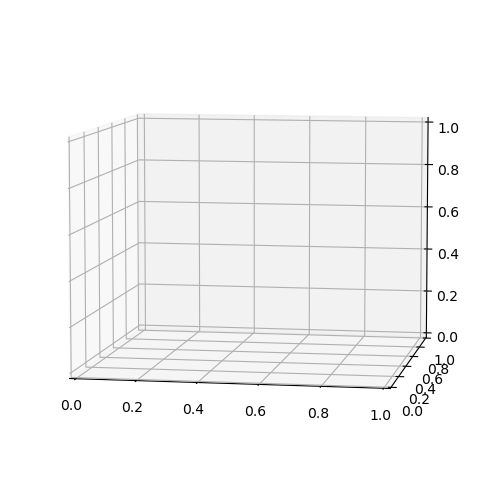

In [14]:
import mpl_toolkits.mplot3d.axes3d as p3
# #############################################################################
# Plot the result
fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(7, -80)
ax.scatter(X[0], X[1], X[2],
           color=plt.cm.jet(y/y.max()),
           s=20, edgecolor='k')
plt.show()